In [161]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import utils

In [113]:
# cargar el dataset en un dataframe usando pandas
train = pd.read_csv("C:/Users/Franco/jm_train.csv")
test = pd.read_csv("C:/Users/Franco/jm_X_test.csv")
sample = pd.read_csv("C:/Users/Franco/ejemplo_predicciones.csv")

Evaluar carga

In [225]:
train.tail(5)

,feature1,feature2,feature3,feature4,feature5,feature6,target
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509,0
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946,1
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907,3
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569,4
2099,-0.083489,-1.194784,-0.389204,-2.369081,0.382413,-0.900237,3


In [226]:
test.tail(5)

,feature1,feature2,feature3,feature4,feature5,feature6
895,0.196663,-0.866822,-1.132836,-0.700726,-0.886717,-0.680351
896,1.306644,0.543675,0.555275,-0.518374,0.796236,0.297632
897,-1.009089,0.359536,-2.253087,0.125687,-1.881437,-1.704497
898,-0.339431,-0.560891,-0.256911,-1.576351,0.317480,-0.742085
899,1.610331,0.260853,-0.691291,-1.572666,0.096514,-0.750690


In [227]:
sample.tail(5)

,final_status
25,0
26,1
27,1
28,0
29,1


In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


In [229]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  900 non-null    float64
 1   feature2  900 non-null    float64
 2   feature3  900 non-null    float64
 3   feature4  900 non-null    float64
 4   feature5  900 non-null    float64
 5   feature6  900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


Verificar data si existen datos nulos

In [230]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores nulos por columna para train")
print (train.apply(num_missing, axis=0))
print ("--------------------------------------------")
print ("Valores nulos por columna para test")
print (test.apply(num_missing, axis=0))

Valores nulos por columna para train
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
target      0
dtype: int64
--------------------------------------------
Valores nulos por columna para test
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
dtype: int64


Hallar datos estadisticos:

In [231]:
train.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


In [232]:
test.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953


Grafico cruzado del train

<AxesSubplot:>

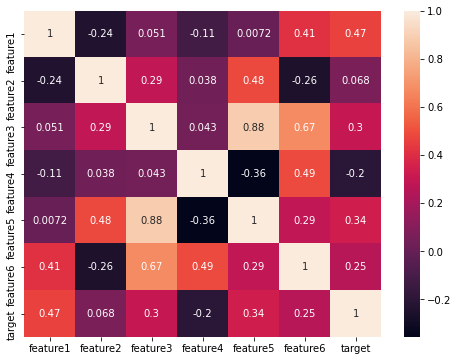

In [233]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), annot=True)

Nombrar los valores (Features) y los resultados (Train_labes):

In [234]:
#set up features
features=['feature1', 'feature2', 'feature3', 'feature4', 'feature5','feature6']

train_labels = np.array(train.target.values.reshape(-1, 1), dtype=np.float32)

Definir los valores X , X_test e y : 

In [235]:
X=train[features]
y=train_labels
X_test=test[features]

Ajustar los valores con MinMaxScaler :

In [236]:
#scale x, y and x_test
mm = MinMaxScaler()
X=mm.fit_transform(X)
y=mm.fit_transform(y)
X_test=mm.fit_transform(X_test)

Reprocesar el valor de y con labelencoder (multiclas):

In [238]:
lab_enc = preprocessing.LabelEncoder()
y2 = lab_enc.fit_transform(y)


C:\Users\Franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Ajustar la informacion con SMOTE

In [239]:
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_resample(X, y2)


Separar el data train del data test con un 30% de test:

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,# Covariables
                                                    y2,             # Target
                                                    test_size=0.30,                               # Tamano del test
                                                    #stratify=train_parametrica['target'],    # Estratificacion
                                                   random_state=1)

In [241]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1470, 6), (630, 6), (1470,), (630,))

Aplicar randomforesclasificador:

In [242]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000,
                            criterion = 'entropy',
                            random_state = 40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [243]:
# scoring
print ("\tAccuracy: %1.3f\n" %accuracy_score(y_test, y_pred))
print("\tf1_score: %1.3f\n" %f1_score(y_test, y_pred, average='weighted'))
print ("\trecall: %1.3f\n" %recall_score(y_test, y_pred, average='weighted'))

	Accuracy: 0.786

	f1_score: 0.786

	recall: 0.786



Matriz de confusion:

In [244]:
confmtrx = np.array(confusion_matrix(y_test, y_pred))
pd.DataFrame(confmtrx, index=['0','1','2', '3','4'],
columns=['0','1','2', '3','4'])

,0,1,2,3,4
0,113,10,11,3,1
1,5,90,13,9,1
2,5,13,89,7,10
3,1,11,7,105,11
4,4,1,7,5,98


Accuracy statistics:

In [245]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))  
class_report=classification_report(y_test, y_pred)
print(class_report)

Accuracy Score: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       138
           1       0.72      0.76      0.74       118
           2       0.70      0.72      0.71       124
           3       0.81      0.78      0.80       135
           4       0.81      0.85      0.83       115

    accuracy                           0.79       630
   macro avg       0.79      0.79      0.79       630
weighted avg       0.79      0.79      0.79       630



Presdicion en la data test:

In [246]:
predictions = rf.predict(X_test)

Carga de resultados:

In [247]:
submission = pd.DataFrame({
                "final_status": predictions.flatten()
    })
submission.to_csv('volcanes.csv', index=False)
submission

,final_status
0,2
1,2
2,1
3,3
4,1
...,...
625,2
626,3
627,1
628,0
